# Molecular Dynamics: Lab 2

In part based on [Fortran code from Furio Ercolessi](http://www.fisica.uniud.it/~ercolessi/md/f90/) and the [CHEM126 course of Kalju Khan](http://web.chem.ucsb.edu/~kalju/chem126).

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Energy minimization

In lab 1 we worked with the Lennard-Jones potential. Other simple potentials include the **harmonic** potential

$$
\begin{equation}
  V = \frac{1}{2} k \left( r - r_{\text{eq}} \right)^2
\end{equation}
$$

with harmonic constant $k$ and equilibrium position $r_{\text{eq}}$, the **Kratzer** potential

$$
\begin{equation}
  V = D_0 \left( \frac{r-r_{\text{eq}}}{r} \right)^2
\end{equation}
$$

with dissociation energy $D_0$, and the **Morse** potential

$$
\begin{equation}
 V = D_0 \left[ 1 - e^{-\alpha (r - r_{\text{eq}})} \right]^2
\end{equation}
$$

where $\alpha$ is the Morse parameter.

### Carbon Monoxide

For example, carbon monoxide (CO) consists of one carbon atom (atomic weight 12.011) and one oxygen atom (atomic weight 15.999) separated by 1.1283 Angstroms. This can be modelled by 

1. a harmonic potential with $k = 2743.0$ and $r_{\text{eq}} = 1.1283$ Angstroms, or
2. a Kratzer potential with $D_0 = 258.9$ kcal/mol and the same equilibrium distance, or
3. a Morse potential with $\alpha = 2.302$ Angstroms${}^{-1}$, and the same dissociation energy and equilibrium distance.

Using standard minimization algorithms (e.g. `scipy.optimize.minimize`) show that, for suitable initial guesses, all of the above potentials have minima at the expected location. 

By plotting the potentials, understand why the success of the algorithms changes. 

Briefly test how changing the potential changes the number of steps required by the algorithm. 

Also compute the force $\frac{dV}{dr}$ at the minimum point for each potential to check that it vanishes as expected.

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)
from scipy.optimize import minimize

In [3]:
k       = 2743.0     # Harmonic force constant
r_eq    = 1.1283     # Equilibrium distance
D0      = 258.9      # Dissociation energy
alpha   = 2.302      # Morse parameter

In [4]:
def Harmonic_V(r):
    return 0.5*k*(r-r_eq)**2

def Kratzer_V(r):
    return D0*((r-r_eq)/r)**2

def Morse_V(r):
    return D0*(1.0-numpy.exp(-alpha*(r-r_eq)))**2

In [5]:
starting_points = [1.1283, 1.13, 1.12, 1.1, 1.3, 1.5] # Starting locations in Angstroms
potentials = {'Harmonic': Harmonic_V, 'Kratzer': Kratzer_V, 'Morse': Morse_V}

for r_ini in starting_points:
    for name in potentials:
        res = minimize(potentials[name], r_ini)
        if res.success:
            print("Starting from {} the {} potential found:\n Separation {}\n in {} 
                  function evaluations\nand {} Jacobian evalutions".format(r_ini, name, res.x, res.nfev, res.njev))
        else:
            print("Starting from {} the {} potential minimization failed".format(r_ini, name))

Starting from 1.1283 the Kratzer potential found:
 Separation [ 1.1283]
 in 3 function evaluations
and 1 Jacobian evalutions
Starting from 1.1283 the Harmonic potential minimization failed
Starting from 1.1283 the Morse potential minimization failed
Starting from 1.13 the Kratzer potential found:
 Separation [ 1.12829999]
 in 18 function evaluations
and 6 Jacobian evalutions
Starting from 1.13 the Harmonic potential found:
 Separation [ 1.12829999]
 in 9 function evaluations
and 3 Jacobian evalutions
Starting from 1.13 the Morse potential found:
 Separation [ 1.12829999]
 in 24 function evaluations
and 8 Jacobian evalutions
Starting from 1.12 the Kratzer potential found:
 Separation [ 1.12829999]
 in 18 function evaluations
and 6 Jacobian evalutions
Starting from 1.12 the Harmonic potential found:
 Separation [ 1.12829999]
 in 9 function evaluations
and 3 Jacobian evalutions
Starting from 1.12 the Morse potential found:
 Separation [ 1.12829999]
 in 24 function evaluations
and 8 Jacobi

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
//anaconda/lib/python2.7/site-packages/scipy/optimize/optimize.py:556: RuntimeWarning: invalid value encountered in subtract
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


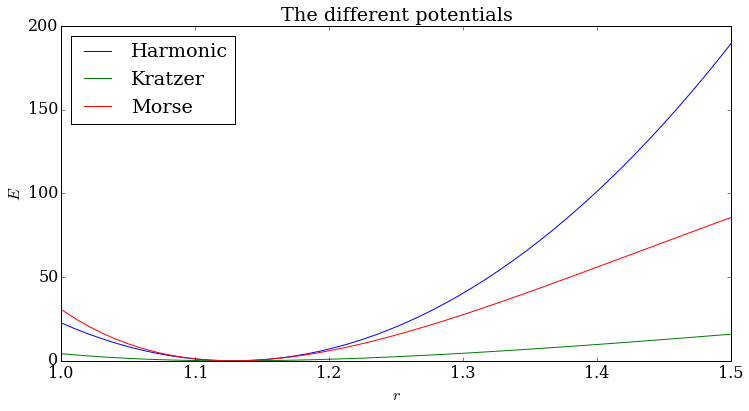

In [6]:
r = numpy.linspace(1.0, 1.5)
E_Harmonic = Harmonic_V(r)
E_Kratzer = Kratzer_V(r)
E_Morse = Morse_V(r)
pyplot.plot(r, E_Harmonic, label='Harmonic')
pyplot.plot(r, E_Kratzer, label='Kratzer')
pyplot.plot(r, E_Morse, label='Morse')
pyplot.xlim(1.0, 1.5)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$E$")
pyplot.title('The different potentials')
pyplot.legend(loc='upper left');

In [7]:
import sympy
sympy.init_printing()

In [8]:
E_H, E_K, E_M, r, k, r_eq, D_0, alpha = sympy.symbols('E_H, E_K, E_M, r, k, r_eq, D_0, alpha')
E_H = k/2*(r-r_eq)**2
E_K = D_0*((r-r_eq)/r)**2
E_M = D_0*(1-sympy.exp(-alpha*(r-r_eq)))**2

In [9]:
# Harmonic force
F_H = sympy.diff(E_H, r)
F_H

k*(2*r - 2*r_eq)/2

In [10]:
# Kratzer force
F_K = sympy.diff(E_K, r)
F_K

D_0*(2*r - 2*r_eq)/r**2 - 2*D_0*(r - r_eq)**2/r**3

In [11]:
# Morse force
F_M = sympy.diff(E_M, r)
F_M

2*D_0*alpha*(1 - exp(-alpha*(r - r_eq)))*exp(-alpha*(r - r_eq))

In [12]:
print("The forces at equilibrium are {}, {}, {} (Harmonic, Kratzer, Morse)".format(F_H.subs([(r, 1.1283), (r_eq, 1.1283), (k, 2743.0)]),
                                                                                   F_K.subs([(r, 1.1283), (r_eq, 1.1283), (D_0, 258.9)]),
                                                                                   F_M.subs([(r, 1.1283), (r_eq, 1.1283), (D_0, 258.9), (alpha, 2.302)])))

The forces at equilibrium are 0, 0, 0 (Harmonic, Kratzer, Morse)


In [13]:
sympy.init_printing(use_latex=False)

### Evolution

Using your velocity-Verlet integrator from lab 1, evolve the CO molecule using the Morse potential. Note that, unlike lab 1, the two particles now have different mass. It is perhaps easiest to scale it so that the carbon particle has mass $1$ and the oxygen mass $1.332029$. Do *not* use periodic boundaries! Try using $\Delta t = 0.001$ up to $t=1$. Start from the equilibrium position and show that it does not evolve. The move the location of the oxygen atom slightly and see how it evolves.

In [14]:
def potential(x, mass):
    """
    Compute the accelerations given the locations for the Lennard-Jones potential.
    
    Parameters
    ----------
    
    x : array of float
        Particle positions
    mass : array of float
        Particle masses
        
    Returns
    -------
    
    a : array of float
        Particle accelerations
    """
    
    ndim, N = x.shape
    
    r_eq    = 1.1283     # Equilibrium distance
    D0      = 258.9      # Dissociation energy
    alpha   = 2.302      # Morse parameter
    
    def Morse_V(r):
        return D0*(1.0-numpy.exp(-alpha*(r-r_eq)))**2
    def Morse_dV(r):
        return -alpha*2.0*D0*numpy.exp(-alpha*(r-r_eq))*(1.0-numpy.exp(-alpha*(r-r_eq)))
    a = numpy.zeros_like(x)
    
    for i in range(N):
        for j in range(i+1, N):
            separation = x[:, i] - x[:, j]
            r = numpy.sqrt(numpy.dot(separation, separation))
            phi = Morse_V(r)
            dphi = Morse_dV(r)
            a[:, i] += dphi * separation / mass[i]
            a[:, j] -= dphi * separation / mass[j]
                
    return a

In [15]:
def verlet(x, v, a, mass, potential, dt):
    """
    Velocity verlet algorithm.
    
    Parameters
    ----------
    
    x : array of float
        Positions of the particles
    v : array of float
        Velocities of the particles
    a : array of float
        Accelerations of the particles
    potential : function
        Compute the acceleration from the potential
    dt : float
        timestep
        
    
    Returns
    -------
    
    xnew : array of float
        Positions of the particles
    vnew : array of float
        Velocities of the particles
    anew : array of float
        Accelerations of the particles
    """
    
    xnew = x + dt*v + 0.5*dt**2*a
    vstar = v + 0.5*dt*a
    anew = potential(xnew, mass)
    vnew = vstar + 0.5*dt*anew
    
    return xnew, vnew, anew

In [16]:
# Setup data in equilibrium
x = numpy.array([[0.0, 1.1283], [0.0, 0.0], [0.0, 0.0]])
v = numpy.zeros_like(x)
a = numpy.zeros_like(x)
mass = [1.0, 1.332029]
dt = 0.001
nsteps = 1000
t = numpy.zeros((nsteps+1,1))
positions = numpy.zeros((nsteps+1, x.shape[0], x.shape[1]))
positions[0,:,:] = x.copy()

In [17]:
for n in range(20):
    t[n+1] = t[n]+dt
    x, v, a = verlet(x, v, a, mass, potential, dt)
    positions[n+1,:,:] = x.copy()

In [18]:
# The x location of particle 2 is unchanged
positions[:,0,1]

array([ 1.1283,  1.1283,  1.1283, ...,  0.    ,  0.    ,  0.    ])

In [19]:
# Setup data out of equilibrium
x = numpy.array([[0.0, 1.1285], [0.0, 0.0], [0.0, 0.0]])
v = numpy.zeros_like(x)
a = numpy.zeros_like(x)
mass = [1.0, 1.332029]
dt = 0.001
nsteps = 1000
t = numpy.zeros((nsteps+1,1))
positions = numpy.zeros((nsteps+1, x.shape[0], x.shape[1]))
positions[0,:,:] = x.copy()

In [20]:
for n in range(nsteps):
    t[n+1] = t[n]+dt
    x, v, a = verlet(x, v, a, mass, potential, dt)
    positions[n+1,:,:] = x.copy()

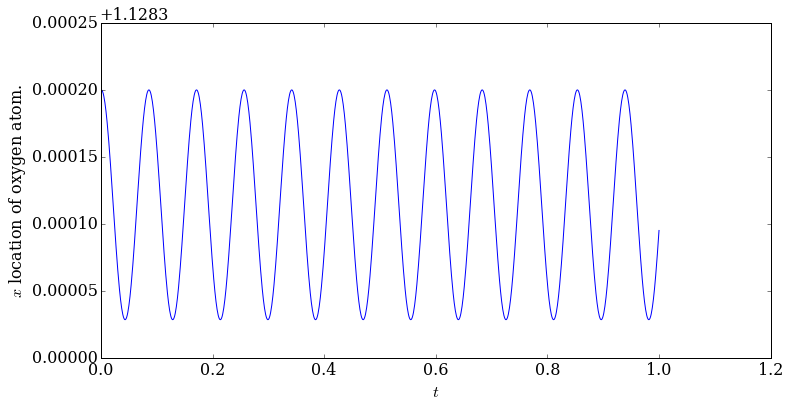

In [21]:
pyplot.plot(t, positions[:, 0, 1])
pyplot.xlabel(r"$t$")
pyplot.ylabel(r"$x$ location of oxygen atom.");

In [22]:
# Now try a 3d perturbation.
x0 = 1.1283 / numpy.sqrt(3.0)
x = numpy.array([[0.0, x0+1e-3], [0.0, x0-1e-4], [0.0, x0+1e-5]])
v = numpy.zeros_like(x)
a = numpy.zeros_like(x)
mass = [1.0, 1.332029]
dt = 0.001
nsteps = 1000
t = numpy.zeros((nsteps+1,1))
positions = numpy.zeros((nsteps+1, x.shape[0], x.shape[1]))
positions[0,:,:] = x.copy()

In [23]:
for n in range(nsteps):
    t[n+1] = t[n]+dt
    x, v, a = verlet(x, v, a, mass, potential, dt)
    positions[n+1,:,:] = x.copy()

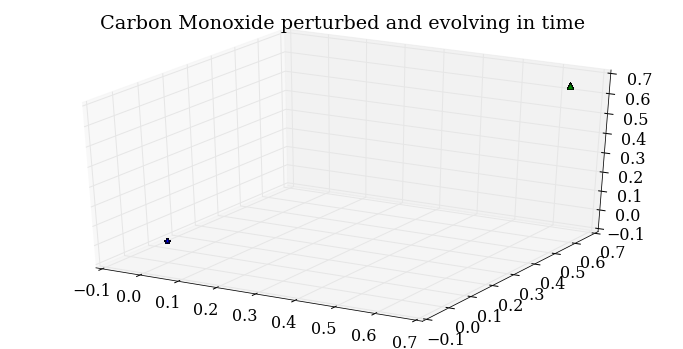

In [24]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(positions[:,0,0], positions[:,1,0], positions[:,2,0], 'b*')
ax.plot3D(positions[:,0,1], positions[:,1,1], positions[:,2,1], 'g^');
ax.set_title('Carbon Monoxide perturbed and evolving in time');

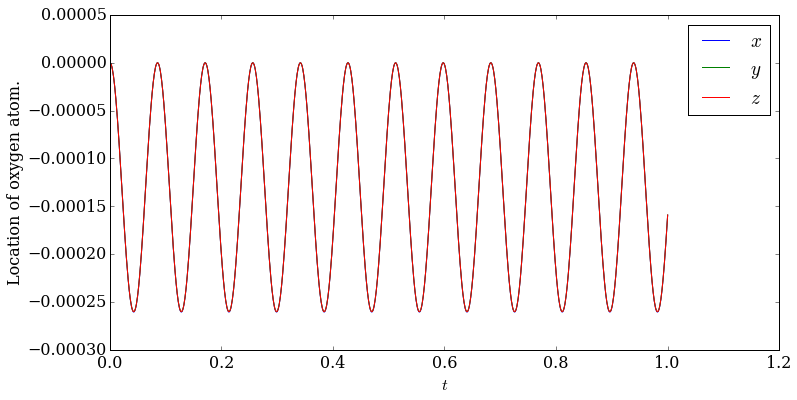

In [25]:
pyplot.plot(t, positions[:, 0, 1] - positions[0, 0, 1], label = r"$x$")
pyplot.plot(t, positions[:, 1, 1] - positions[0, 1, 1], label = r"$y$")
pyplot.plot(t, positions[:, 2, 1] - positions[0, 2, 1], label = r"$z$")
pyplot.legend()
pyplot.xlabel(r"$t$")
pyplot.ylabel(r"Location of oxygen atom.");

## Water

The paper of [Praprotnik, Janezic, and Mavri](http://dx.doi.org/10.1021/jp046158d) suggests a potential for a single water molecule (one oxygen atom and two hydrogen with atomic weights $1.008$) of

$$
\begin{equation}
  V = \sum_{l = 1}^2 D_0 \left[ 1 - e^{\alpha \Delta r_{OH_l}} \right]^2 + \frac{1}{2} k_{\theta} \Delta r_{HH}^2 + k_{r \theta} \Delta r_{HH} \left( \Delta r_{OH_1} + \Delta r_{OH_2} \right) + k_{rr} \Delta r_{OH_1} \Delta r_{OH_2}.
\end{equation}
$$

The first term is the Morse potential again, and the other terms are the intra-molecule bond potentials. $\Delta r_{OH_l} = r_{OH_l} - r_{OH_{\text{eq}}}$ is the stretch in the distance between the oxygen atom and the $l^{\text{th}}$ hydrogen atom $r_{OH_l}$ and its equilibrium value, and $\Delta r_{HH} = r_{HH_l} - r_{HH_{\text{eq}}}$ is the stretch in the distance between the hydrogen atoms. The parameter values are

1. $D_0 = 101.9188$ kcal/mol.
2. $\alpha = 2.567$ Angstrom${}^{-1}$
3. $k_{\theta} = 328.645606$ kcal/mol/Angstrom${}^2$
4. $k_{r \theta} = -211.4672$ kcal/mol/Angstrom${}^2$
5. $k_{rr} = 111.70765$ kcal/mol/Angstrom${}^2$
6. $r_{OH_{\text{eq}}} = 1$ Angstrom
7. $r_{HH_{\text{eq}}} = 1.633$ Angstrom


Fix the oxygen atom at the origin and start the hydrogen atoms at $(\pm 0.8, 0.6, 0)$. Use the minimization techniques to find the equilibrium position of the atoms, [comparing against the known structure of water](http://en.wikipedia.org/wiki/Water_model).

**NOTE**: if using `scipy`'s minimization routine, you may have to increase the tolerance as high as $10^{-4}$ to make it converge.

In [26]:
def E_water(x):
    D0 = 101.9188
    alpha = 2.567
    kt = 328.645606
    krt = -211.4672
    krr = 111.70765
    r_OH_eq = 1.0
    r_HH_eq = 1.633
    x_h1 = x[:3]
    x_h2 = x[3:]
    dr_oh1 = numpy.abs(numpy.linalg.norm(x_h1, 2)-r_OH_eq)
    dr_oh2 = numpy.abs(numpy.linalg.norm(x_h2, 2)-r_OH_eq)
    dr_hh = numpy.abs(numpy.linalg.norm(x_h1 - x_h2, 2)-r_HH_eq)
    
    term1_1 = D0*(1.0 - numpy.exp(alpha*dr_oh1))**2
    term1_2 = D0*(1.0 - numpy.exp(alpha*dr_oh2))**2
    term2 = 0.5 * kt * dr_hh**2
    term3 = krt * dr_hh * (dr_oh1 + dr_oh2)
    term4 = krr * dr_oh1 * dr_oh2
    
    term5 = 1000.0 * (x_h1[2]**2 + x_h2[2]**2)
    
    return term1_1 + term1_2 + term2 + term3 + term4 + term5

In [27]:
res = minimize(E_water, [0.8, 0.6, 0.0, -0.8, 0.6, 0.0], tol = 1e-4)

In [28]:
res

   status: 0
  success: True
     njev: 25
     nfev: 200
 hess_inv: array([[  6.11137573e-03,  -1.17970564e-02,  -1.44795649e-07,
          3.36218840e-03,   3.01962371e-03,   5.34198888e-06],
       [ -1.17970564e-02,   2.47009104e-02,  -1.33847162e-06,
         -6.96982385e-03,  -7.14424025e-03,  -1.64842258e-05],
       [ -1.44795649e-07,  -1.33847162e-06,   4.99906383e-04,
         -1.61082955e-07,  -6.07608208e-07,  -2.83970391e-08],
       [  3.36218840e-03,  -6.96982385e-03,  -1.61082955e-07,
          4.14571162e-03,   4.93165719e-03,   5.73379767e-06],
       [  3.01962371e-03,  -7.14424025e-03,  -6.07608208e-07,
          4.93165719e-03,   7.96444218e-03,   5.18020547e-06],
       [  5.34198888e-06,  -1.64842258e-05,  -2.83970391e-08,
          5.73379767e-06,   5.18020547e-06,   4.99694191e-04]])
      fun: 1.4043324104612636e-12
        x: array([  8.33090981e-01,   5.53136062e-01,  -7.48399170e-09,
        -7.99205710e-01,   6.01057617e-01,  -7.73901292e-09])
  message: '

Using your integrator, evolve the molecule and see how it behaves.

Going to need to define some notation. Given eg

$$
\begin{align}
  d r_{OH_l} & = | \vec{r}_O - \vec{r}_{H_l} | \\ d r_{HH} & = | \vec{r}_{H_1} - \vec{r}_{H_2} |
\end{align}
$$

the stretch is

$$
\begin{align}
  \Delta r_{OH_l} & = | d r_{OH_l} - r_{OH_{\text{eq}}} | \\ \Delta r_{HH} & = | d r_{HH} - r_{HH_{\text{eq}}} |.
\end{align}
$$

Then schematically

$$
\begin{equation}
  \frac{\partial \Delta r_{XY}}{\partial \vec{r}_Z} = \frac{1}{\Delta r_{XY}} \frac{1}{d r_{XY}} \left( d r_{XZ} - r_{XZ_{\text{eq}}} \right) \left( \vec{r}_{X} - \vec{r}_{Z} \right)
\end{equation}
$$

where we've assumed $Y = Z$ (ie, this term is only non-zero if the particle position we vary comes into this stretch term).

We get

$$
\begin{align}
  \vec{F}_{O} & = - \frac{\partial V}{\partial \vec{r}_O} \\
  & = - \left\{ -2 D_0 \sum_{l=1}^2 \left[ 1 - e^{\alpha \Delta r_{OH_l}} \right] \frac{\partial \Delta r_{OH_l}} {\partial \vec{r}_O} \alpha e^{\alpha \Delta r_{OH_l}} + \right. \\ & \qquad \left. k_{r \theta} \Delta r_{HH} \left( \frac{\Delta r_{OH_1}}{\partial \vec{r}_O} + \frac{\Delta r_{OH_2}}{\partial \vec{r}_O} \right) + \right. \\ & \qquad\left. k_{rr} \left( \frac{\partial \Delta r_{OH_1}}{\partial \vec{r}_O}  \Delta r_{OH_2} + \Delta r_{OH_1} \frac{\partial \Delta r_{OH_2}}{\partial \vec{r}_O} \right) \right\}, \\
  \vec{F}_{H_1} & = -\left\{  -2 D_0 \left[ 1 - e^{\alpha \Delta r_{OH_1}} \right] \frac{\partial \Delta r_{OH_l}}{\partial \vec{r}_{H_1}}  \alpha e^{\alpha \Delta r_{OH_1}} + \right. \\& \qquad \left. k_{\theta} \Delta r_{HH} \frac{\partial \Delta r_{HH}}{\partial \vec{r}_{H_1}} + k_{r \theta} \left[ \frac{\partial \Delta r_{HH}}{\partial \vec{r}_{H_1}} \left( \Delta r_{OH_1} + \Delta r_{OH_2} \right) + \Delta r_{HH} \frac{\partial r_{OH_1}}{\partial \vec{r}_{H_1}} \right] + \right. \\ & \qquad \left. k_{rr} \Delta r_{OH_2} \frac{\partial \Delta r_{OH_1}}{\partial \vec{r}_{H_1}} \right\}
\end{align}
$$

In [29]:
def potential_water(x, mass):
    """
    Compute the accelerations given the locations for the Lennard-Jones potential.
    
    Parameters
    ----------
    
    x : array of float
        Particle positions
    mass : array of float
        Particle masses
        
    Returns
    -------
    
    a : array of float
        Particle accelerations
    """
    
    ndim, N = x.shape
    assert(N==3)
    
    D0 = 101.9188
    alpha = 2.567
    kt = 328.645606
    krt = -211.4672
    krr = 111.70765
    r_OH_eq = 1.0
    r_HH_eq = 1.633
    
    r_O = x[:,0]
    r_H_1 = x[:,1]
    r_H_2 = x[:,2]
    diff_r_OH_1 = numpy.linalg.norm(r_O-r_H_1,2)
    diff_r_OH_2 = numpy.linalg.norm(r_O-r_H_2,2)
    diff_r_HH = numpy.linalg.norm(r_H_1-r_H_2,2)
    dr_OH_1 = numpy.abs(diff_r_OH_1-r_OH_eq)
    dr_OH_2 = numpy.abs(diff_r_OH_2-r_OH_eq)
    dr_HH = numpy.abs(diff_r_HH-r_HH_eq)
    
    # Derivatives
    d_dr_OH_1_dO = 1.0/(dr_OH_1*diff_r_OH_1)*(diff_r_OH_1 - r_OH_eq)*(r_O - r_H_1)
    d_dr_OH_2_dO = 1.0/(dr_OH_2*diff_r_OH_2)*(diff_r_OH_2 - r_OH_eq)*(r_O - r_H_2)
    d_dr_OH_1_dH1 = -d_dr_OH_1_dO
    d_dr_OH_2_dH2 = -d_dr_OH_2_dO
    d_dr_HH_dH1 = 1.0/(dr_HH*diff_r_HH)*(diff_r_HH - r_HH_eq)*(r_H_1 - r_H_2)
    d_dr_HH_dH2 = -d_dr_HH_dH1
    
    # Acceleration
    a = numpy.zeros_like(x)
    # Oxygen
    a[:,0] = (2.0*D0*alpha*((1.0-numpy.exp(alpha*dr_OH_1))*numpy.exp(alpha*dr_OH_1)*d_dr_OH_1_dO\
                            +(1.0-numpy.exp(alpha*dr_OH_2))*numpy.exp(alpha*dr_OH_2)*d_dr_OH_2_dO)-\
              krt*dr_HH*(d_dr_OH_1_dO+d_dr_OH_2_dO)-\
              krr*(d_dr_OH_1_dO*dr_OH_2+dr_OH_1*d_dr_OH_2_dO)) / mass[1]
    # Hydrogen(s)
    a[:,1] = (2.0*D0*alpha*(1.0-numpy.exp(alpha*dr_OH_1))*numpy.exp(alpha*dr_OH_1)*d_dr_OH_1_dH1-\
              kt*dr_HH*d_dr_HH_dH1-\
              krt*(d_dr_HH_dH1*(dr_OH_1+dr_OH_2)+dr_HH*d_dr_OH_1_dH1)-\
              krr*d_dr_OH_1_dH1*dr_OH_2) / mass[0]
    a[:,2] = (2.0*D0*alpha*(1.0-numpy.exp(alpha*dr_OH_2))*numpy.exp(alpha*dr_OH_2)*d_dr_OH_2_dH2-\
              kt*dr_HH*d_dr_HH_dH2-\
              krt*(d_dr_HH_dH2*(dr_OH_1+dr_OH_2)+dr_HH*d_dr_OH_2_dH2)-\
              krr*d_dr_OH_2_dH2*dr_OH_1) / mass[0]
                
    return a

In [30]:
# Set up the molecule
x = numpy.array([[0.0, res.x[0], res.x[3]], [0.0, res.x[1], res.x[4]], [0.0, res.x[2], res.x[5]]])
v = numpy.zeros_like(x)
a = numpy.zeros_like(x)
mass = [1.008, 15.999]
dt = 0.001
nsteps = 1000
t = numpy.zeros((nsteps+1,1))
positions = numpy.zeros((nsteps+1, x.shape[0], x.shape[1]))
positions[0,:,:] = x.copy()

In [31]:
for n in range(nsteps):
    t[n+1] = t[n]+dt
    x, v, a = verlet(x, v, a, mass, potential_water, dt)
    positions[n+1,:,:] = x.copy()

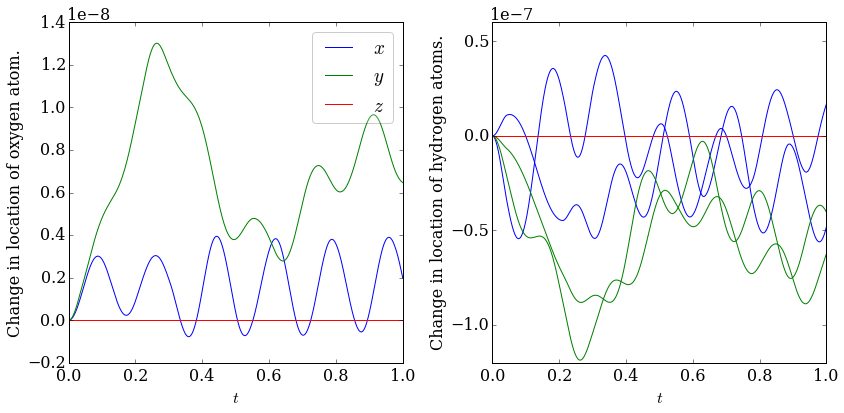

In [32]:
fig = pyplot.figure()
ax1 = fig.add_subplot(121)
ax1.plot(t, positions[:, 0, 0] - positions[0, 0, 0], 'b-', label = r"$x$")
ax1.plot(t, positions[:, 1, 0] - positions[0, 1, 0], 'g-', label = r"$y$")
ax1.plot(t, positions[:, 2, 0] - positions[0, 2, 0], 'r-', label = r"$z$")
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"Change in location of oxygen atom.");
ax1.set_xlim(0,1)
ax1.legend(fancybox=True,framealpha=0.2);
ax2 = fig.add_subplot(122)
for i in range(1,3):
    ax2.plot(t, positions[:, 0, i] - positions[0, 0, i], 'b-')
    ax2.plot(t, positions[:, 1, i] - positions[0, 1, i], 'g-')
    ax2.plot(t, positions[:, 2, i] - positions[0, 2, i], 'r-')
ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"Change in location of hydrogen atoms.");
ax2.set_xlim(0,1)
fig.tight_layout()

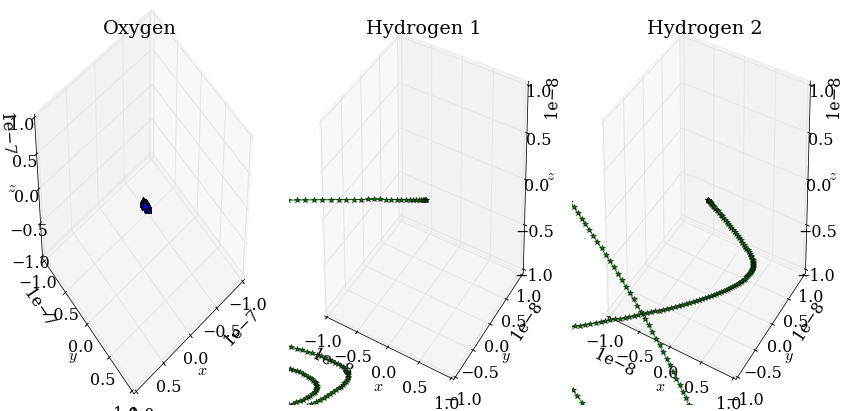

In [33]:
fig = pyplot.figure()
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot3D(positions[:,0,0]-positions[0,0,0], positions[:,1,0]-positions[0,1,0], positions[:,2,0]-positions[0,2,0], 'b^-')
ax1.view_init(50,50)
ax1.set_title('Oxygen');
ax1.set_xlabel(r'$x$');ax1.set_ylabel(r'$y$');ax1.set_zlabel(r'$z$')
ax1.set_xlim3d(-1e-7, 1e-7);ax1.set_ylim3d(-1e-7, 1e-7);ax1.set_zlim3d(-1e-7, 1e-7)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot3D(positions[:,0,1]-positions[0,0,1], positions[:,1,1]-positions[0,1,1], positions[:,2,1]-positions[0,2,1], 'g*-');
#ax2.view_init(50,50)
ax2.set_title('Hydrogen 1');
ax2.set_xlabel(r'$x$');ax2.set_ylabel(r'$y$');ax2.set_zlabel(r'$z$')
ax2.set_xlim3d(-1e-8, 1e-8);ax2.set_ylim3d(-1e-8, 1e-8);ax2.set_zlim3d(-1e-8, 1e-8)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot3D(positions[:,0,2]-positions[0,0,2], positions[:,1,2]-positions[0,1,2], positions[:,2,2]-positions[0,2,2], 'g*-');
#ax3.view_init(50,50)
ax3.set_title('Hydrogen 2');
ax3.set_xlabel(r'$x$');ax3.set_ylabel(r'$y$');ax3.set_zlabel(r'$z$')
ax3.set_xlim3d(-1e-8, 1e-8);ax3.set_ylim3d(-1e-8, 1e-8);ax3.set_zlim3d(-1e-8, 1e-8)
fig.tight_layout()